In [350]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [122]:
plt.rcParams['font.family'] = 'NanumGothic'

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
train = pd.read_csv('../Data/train_preprocess.csv')
test = pd.read_csv('../Data/test_preprocess.csv')
valid = pd.read_csv('../Data/valid_preprocess.csv')

print(train.shape)
print(test.shape)
print(valid.shape)

train.sample()

(59191, 33)
(2957, 32)
(6898, 33)


,id,tag,year,month,day,dayofweek,year-month,year-month-day,hour,minute,...,cctv_dstnc,cctv_in_100m,fr_mn_cnt,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fire_yes
30931,107717,train,2016,5,20,Friday,2016-05,2016-05-20,18,31,...,542,0,176.0,0,1148,6125,704,517,0,False


## Null 값 확인

In [30]:
train.isnull().sum()
test.isnull().sum()
valid.isnull().sum()

id                      0
dt_of_fr                0
bldng_cnt               0
tmprtr                  0
wnd_spd                 0
wnd_drctn               0
hmdt                    0
jmk                     0
emd_nm                  0
hm_cnt                  0
fr_sttn_dstnc           0
fr_wthr_fclt_dstnc      0
mlt_us_yn               0
cctv_dstnc              0
cctv_in_100m            0
fr_mn_cnt               0
fr_wthr_fclt_in_100m    0
tbc_rtl_str_dstnc       0
sft_emrgnc_bll_dstnc    0
ahsm_dstnc              0
no_tbc_zn_dstnc         0
bldng_cnt_in_50m        0
fr_yn                   0
tag                     0
fire_yes                0
mlt_us_yn(encode)       0
year                    0
month                   0
day                     0
hour                    0
minute                  0
second                  0
dayofweek               0
year-month              0
year-month-day          0
address1                0
address2                0
address                 0
wnd_spd(int)

## train, test, valid 데이터 합치기
화재발생여부 제외한 컬럼간 관계 보기 위해서

In [54]:
columns = ['id', 'tag'
           # 날짜
           , 'year', 'month', 'day', 'dayofweek', 'year-month', 'year-month-day', 'hour', 'minute', 'second'
          # 건물 용도
           , 'jmk'
          # 건물 용도 (전처리 안됨)
#            , 'bldng_us', 'bldng_archtctr', 'bldng_us_clssfctn', 'dt_of_athrztn'
          # 건물 정보 (전처리 안됨)
#            , 'bldng_ar', 'ttl_ar', 'lnd_ar', 'ttl_grnd_flr', 'ttl_dwn_flr'
           # 다중이용업소
           , 'mlt_us_yn(encode)'
          # 날씨 정보
           , 'tmprtr', 'wnd_spd', 'wnd_drctn', 'hmdt'
          # 행정구역 정보
           , 'address', 'address1', 'address2', 'hm_cnt'
          # 도심과 가까운 정도
           , 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc', 'cctv_dstnc', 'cctv_in_100m', 'fr_mn_cnt'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc', 'ahsm_dstnc'
           , 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m'
          # 화재발생 여부
#            , 'fire_yes'
          ]

df = pd.concat([train.drop('fire_yes', axis=1), test, valid.drop('fire_yes', axis=1)])
df = df[columns]
print(df.shape)
df.columns

(69046, 32)


Index(['id', 'tag', 'year', 'month', 'day', 'dayofweek', 'year-month',
       'year-month-day', 'hour', 'minute', 'second', 'jmk',
       'mlt_us_yn(encode)', 'tmprtr', 'wnd_spd', 'wnd_drctn', 'hmdt',
       'address', 'address1', 'address2', 'hm_cnt', 'fr_sttn_dstnc',
       'fr_wthr_fclt_dstnc', 'cctv_dstnc', 'cctv_in_100m', 'fr_mn_cnt',
       'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc',
       'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m'],
      dtype='object')

## correlation

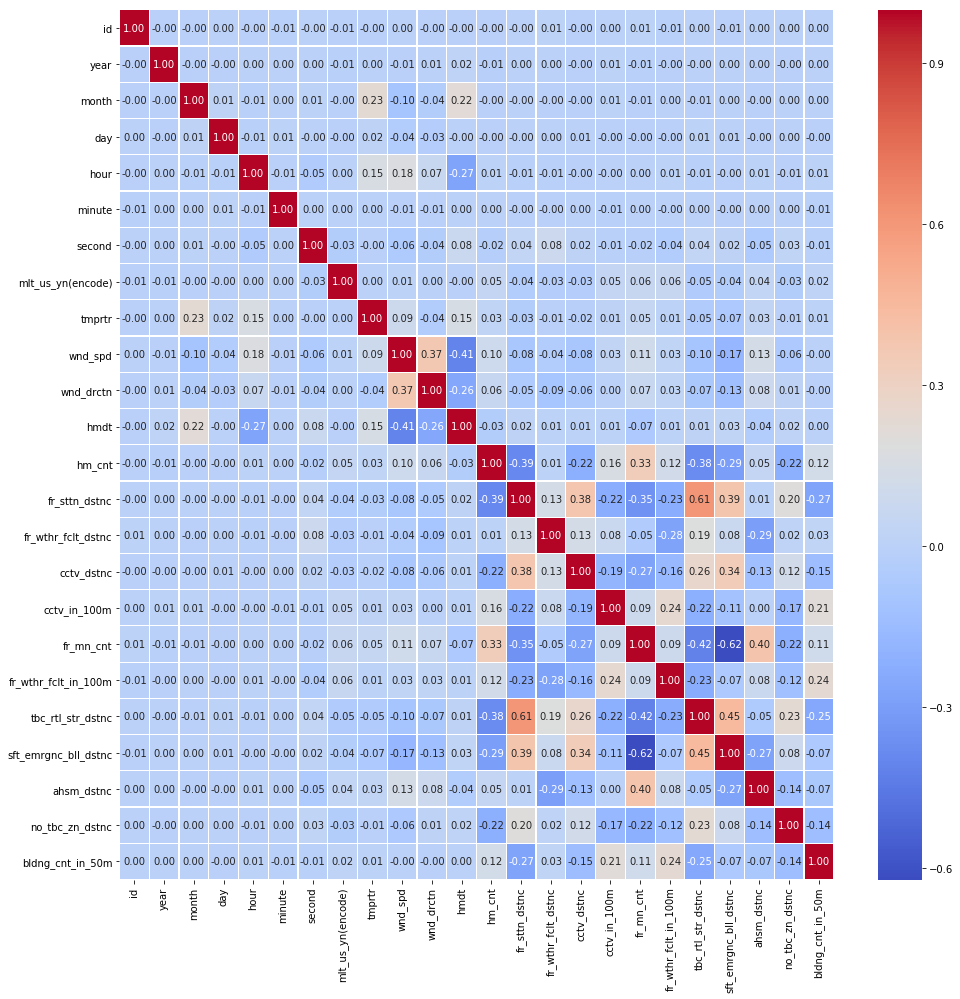

In [101]:
# 화재발생여부 제외한 전체 데이터 correlation
plt.figure(figsize=[16, 16])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='coolwarm')

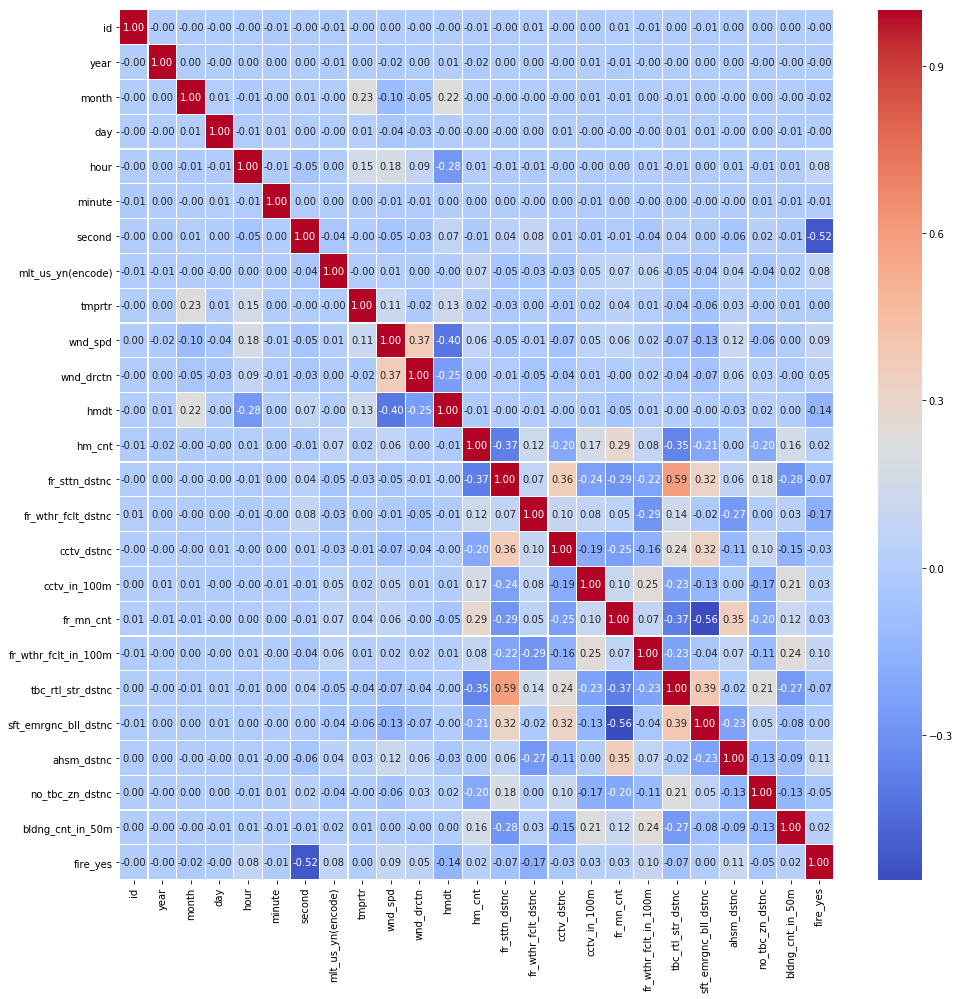

In [60]:
# train 데이터 fire_yes 와의 correlation
plt.figure(figsize=[16, 16])
sns.heatmap(train.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='coolwarm')

### train 데이터 fire_yes 와의 correlation
- month -0.02
- hour 0.078
- second -0.52 (관계없음, 기록의 문제)

#### 기상상황
- wnd_spd 0.089
    - 바람이 세게 불수록
- wnd_drctn 0.051
    - 풍향 숫자로 표시된거 뭘까
- hmdt -0.14
    - 습도가 낮을수록

#### 소방시설 접근성이 높을수록 화재발생
- fr_sttn_dstnc -0.07 
    - 소방서와의 거리가 가까울수록
- fr_wthr_fclt_dstnc -0.16 
    
    - 소방용수시설과 가까울수록 화재발생
    - 가설: 불이 자주 나는 곳에 소방용수시설을 설치했기 때문 ?
    - 검증: 창원시 때문에 왜곡 발생(창원시 화재발생 0건, 다른 지역에 비해 소방용수시설과 멀다)
- fr_wthr_fclt_in_100m 0.096 
    - 100m 내 소방용수시설이 많을수록


#### cctv 관련 항목 2개는 상충된다
- cctv_dstnc -0.029
    - cctv 와의 거리가 멀수록
- cctv_in_100m 0.027
    - 100 m 내 cctv 가 많을수록
    
#### 도시와 가까울수록
- tbc_rtl_str_dstnc -0.065 
    - 담배소매점과 거리가 가까울수록
- no_tbc_zn_dstnc -0.047 
    - 금연구역과의 거리가 가까울수록
- bldng_cnt_in_50m 0.023
    - 50m 내 건물이 많을수록
- hm_cnt 0.022
    - 해당 행정구역 인구가 많을수록 화재발생

#### 자동심장제세동기 설치하는 곳은 어떤곳일까
- ahsm_dstnc 0.11 
    - 자동심장제세동기와의 거리가 멀수록 화재발생
    
#### 기타
- mlt_us_yn(encode)다중이용업소 0.074

## df['fire_yes'] == True 불이 난 날

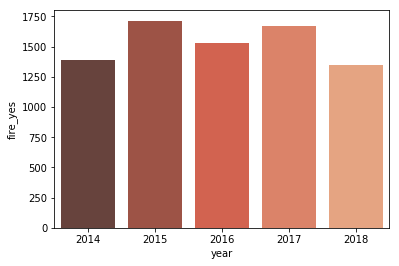

In [83]:
# 연도별 트렌드 확인
data = pd.DataFrame(train.groupby('year')['fire_yes'].sum()).reset_index()

sns.barplot(x='year', y='fire_yes', data=data, palette='OrRd_d')

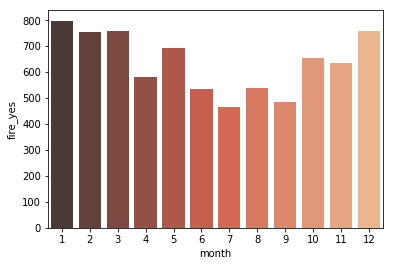

In [84]:
# 월별 트렌드 확인
data = pd.DataFrame(train.groupby('month')['fire_yes'].sum()).reset_index()

sns.barplot(x='month', y='fire_yes', data=data, palette='OrRd_d')

계절성 확인
- 여름에 줄고, 겨울에 늘어난다

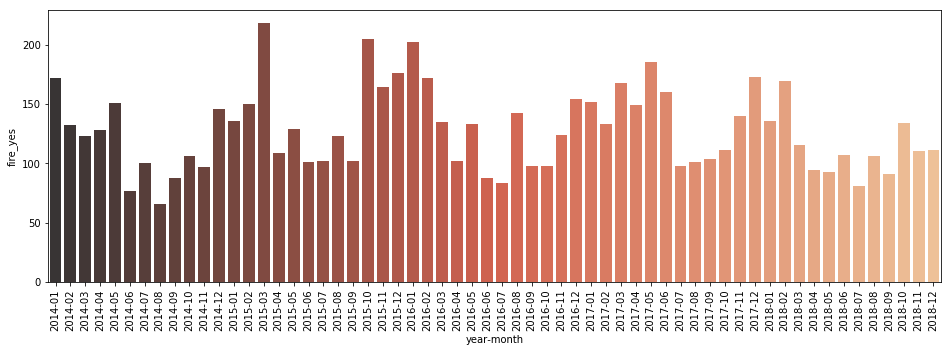

In [85]:
data = pd.DataFrame(train.groupby('year-month')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
sns.barplot(x='year-month', y='fire_yes', data=data, palette='OrRd_d')
plt.xticks(rotation=90)
plt.show()

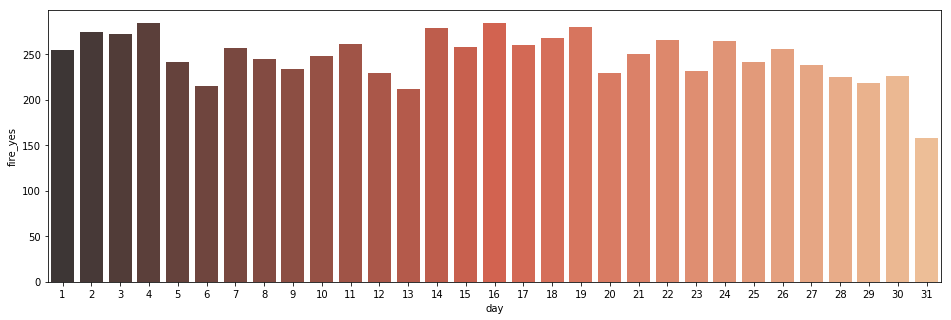

In [86]:
data = pd.DataFrame(train.groupby('day')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
sns.barplot(x='day', y='fire_yes', data=data, palette='OrRd_d')
plt.show()

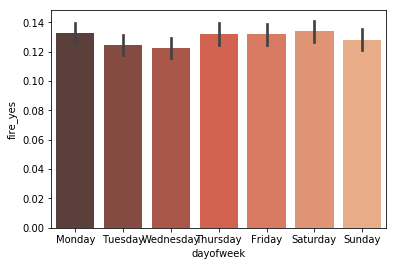

In [87]:
# 요일별 트렌드 확인
data = pd.DataFrame(train.groupby('dayofweek')['fire_yes'].sum()).reset_index()
index_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(x='dayofweek', y='fire_yes', data=train, order=index_weekday, palette='OrRd_d')

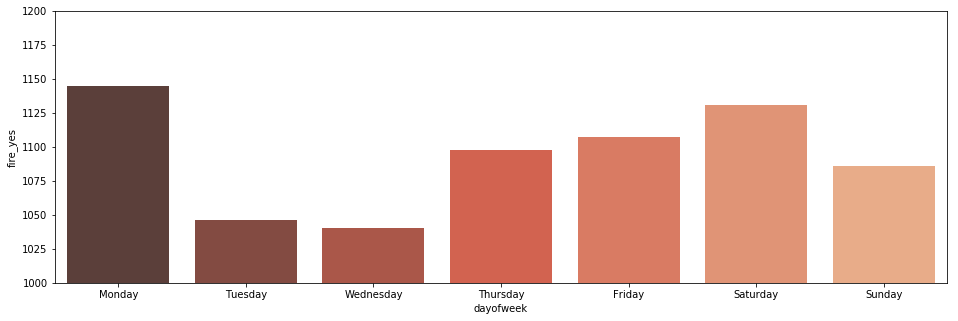

In [88]:
# 요일별 트렌드 확대
plt.figure(figsize=[16, 5])
axes=sns.barplot(x='dayofweek', y='fire_yes', data=data, order=index_weekday, palette='OrRd_d')
axes.set(ylim=(1000, 1200))
plt.show()

# *****요일 - 장소 상관성 확인

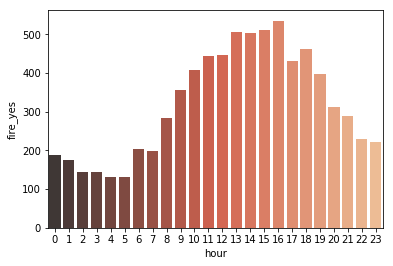

In [89]:
# 시간대별 트렌드
data = pd.DataFrame(train.groupby('hour')['fire_yes'].sum()).reset_index()

sns.barplot(x='hour', y='fire_yes', data=data, palette='OrRd_d')
plt.show()

심야시간 대비 사람들이 활동할 시간에 화재발생 많다

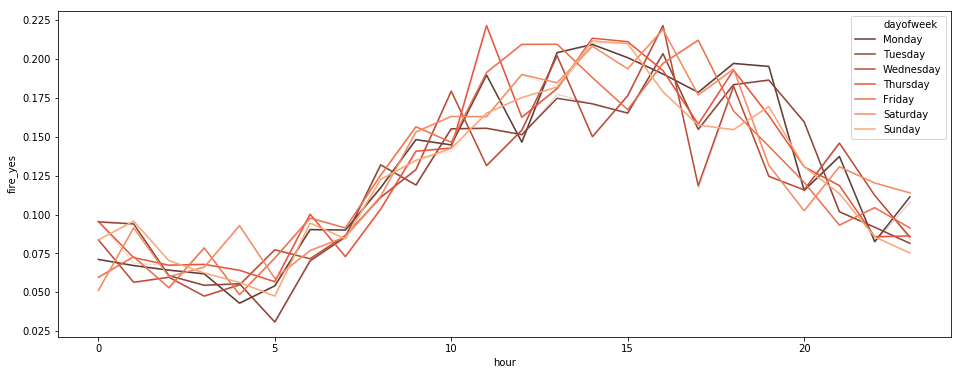

In [82]:
## 요일 시간대 상관성- 딱히 없어보임
plt.figure(figsize=[16, 6])
sns.lineplot(x='hour', y='fire_yes', hue='dayofweek', hue_order=index_weekday, data=train, palette='OrRd_d', ci=False)

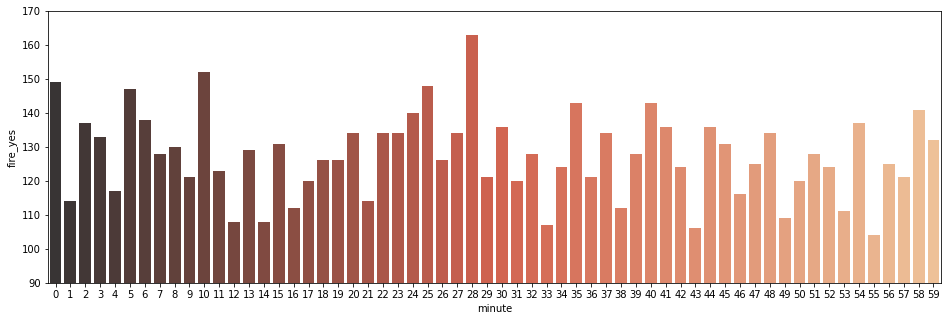

In [90]:
data = pd.DataFrame(train.groupby('minute')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
axes = sns.barplot(x='minute', y='fire_yes', data=data, palette='OrRd_d')
axes.set(ylim=(90, 170))
plt.show()

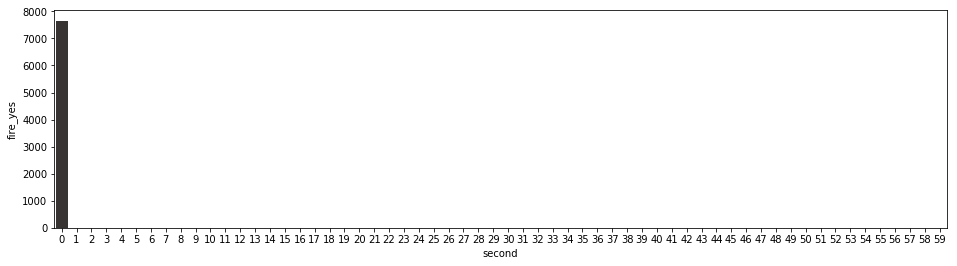

In [92]:
data = pd.DataFrame(train.groupby('second')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 4])
sns.barplot(x='second', y='fire_yes', data=data, palette='OrRd_d')
plt.show()

화재발생 초는 00초로 통일한것으로 보임-의미없음

## df['fire_yes'] == False 불이 안난 날

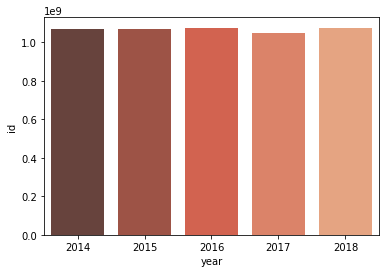

In [93]:
data = pd.DataFrame(train[train['fire_yes'] == False].groupby('year')['id'].sum()).reset_index()

sns.barplot(x='year', y='id', data=data, palette='OrRd_d')

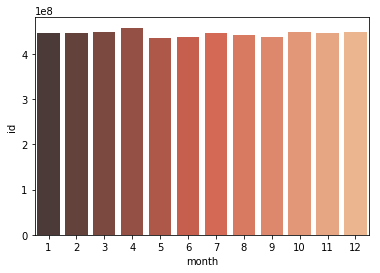

In [94]:
data = pd.DataFrame(train[train['fire_yes'] == False].groupby('month')['id'].sum()).reset_index()

sns.barplot(x='month', y='id', data=data, palette='OrRd_d')

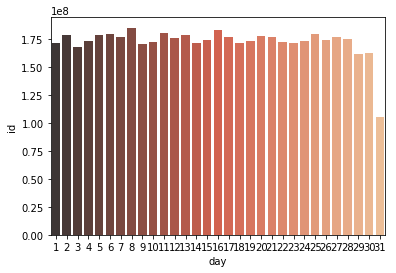

In [95]:
data = pd.DataFrame(train[train['fire_yes'] == False].groupby('day')['id'].sum()).reset_index()

sns.barplot(x='day', y='id', data=data, palette='OrRd_d')

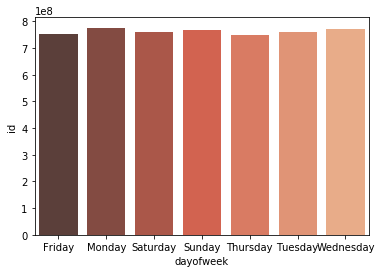

In [96]:
data = pd.DataFrame(train[train['fire_yes'] == False].groupby('dayofweek')['id'].sum()).reset_index()

sns.barplot(x='dayofweek', y='id', data=data, palette='OrRd_d')

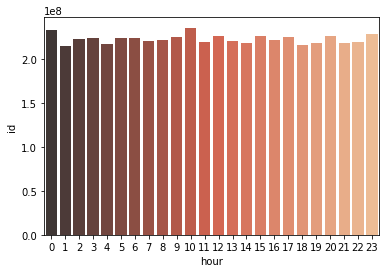

In [97]:
data = pd.DataFrame(train[train['fire_yes'] == False].groupby('hour')['id'].sum()).reset_index()

sns.barplot(x='hour', y='id', data=data, palette='OrRd_d')

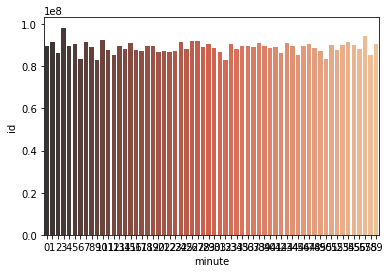

In [98]:
data = pd.DataFrame(train[train['fire_yes'] == False].groupby('minute')['id'].sum()).reset_index()

sns.barplot(x='minute', y='id', data=data, palette='OrRd_d')

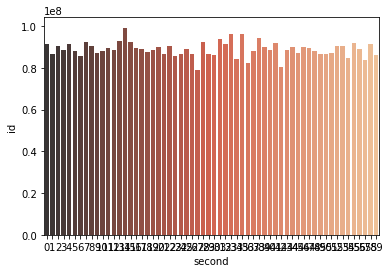

In [99]:
data = pd.DataFrame(train[train['fire_yes'] == False].groupby('second')['id'].sum()).reset_index()

sns.barplot(x='second', y='id', data=data, palette='OrRd_d')

## fr_wthr_fclt_dstnc 소방용수시설과의 최소 거리

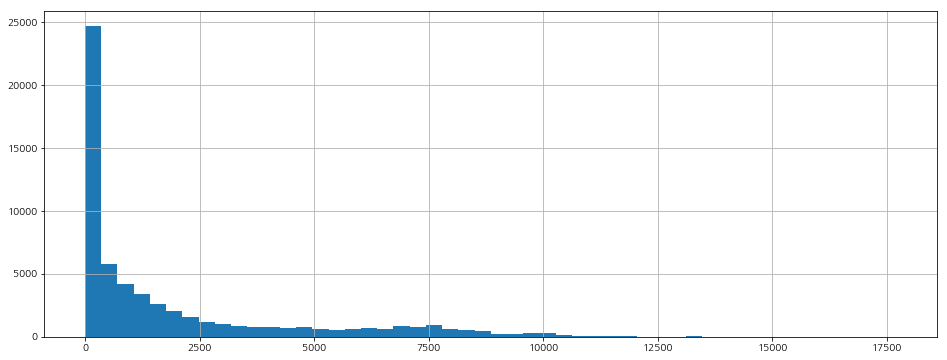

In [133]:
train['fr_wthr_fclt_dstnc'].hist(figsize=[16, 6], bins=50)

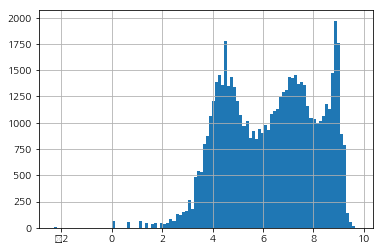

In [134]:
# log scale 적용
train['fr_wthr_fclt_dstnc(log)'] = train['fr_wthr_fclt_dstnc'].apply(lambda x: np.log(x))
train.loc[train['fr_wthr_fclt_dstnc'] == 0, 'fr_wthr_fclt_dstnc(log)'] = np.log(0.1)

train['fr_wthr_fclt_dstnc(log)'].hist(bins=100)

<Figure size 720x720 with 0 Axes>

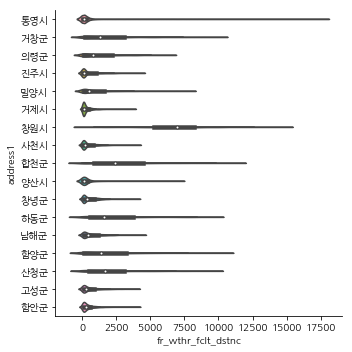

In [129]:
plt.figure(figsize=[10, 10])

sns.catplot(x='fr_wthr_fclt_dstnc', y='address1', data=train, kind='violin')
plt.show()

In [131]:
train[train['address1'] == '창원시']['fire_yes'].value_counts()

False    8442
Name: fire_yes, dtype: int64

창원시가 눈에 띄게 소방용수시설과의 거리가 멀다
- 화재발생여부 컬럼을 찾아보니, 화재발생건이 0건이다
- 그래서 소방용수시설과 가까울수록 화재발생이 많다는 상관관계가 보였던 것

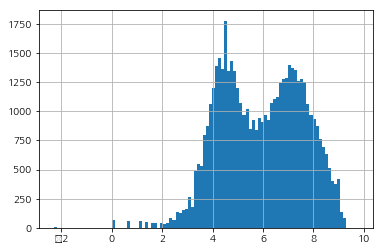

In [135]:
# 창원시 제외
train[train['address1'] != '창원시']['fr_wthr_fclt_dstnc(log)'].hist(bins=100)

창원시를 제외했더니 9 근처에 있던 뾰족한 데이터가 사라짐

## fr_wthr_fclt_in_100m 반경 100m 내 소방용수시설 수
- 100m 내 소방용수시설이 많을수록 화재발생
- 불이 많이 나는 곳일수록 소방용수시설 많이 설치?
- 대부분 없다

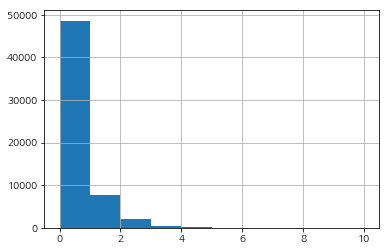

In [154]:
#100m 내 소방용수시설수 전체

train['fr_wthr_fclt_in_100m'].hist()

In [157]:
# 100m 내 소방용수시설수 화재발생건 only

data = pd.DataFrame(train.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum())
data
# data['fire_yes'].hist(bins=50)

,fire_yes
fr_wthr_fclt_in_100m,
0,5537.0
1,1447.0
2,485.0
3,124.0
4,45.0
5,11.0
6,2.0
7,2.0
8,0.0


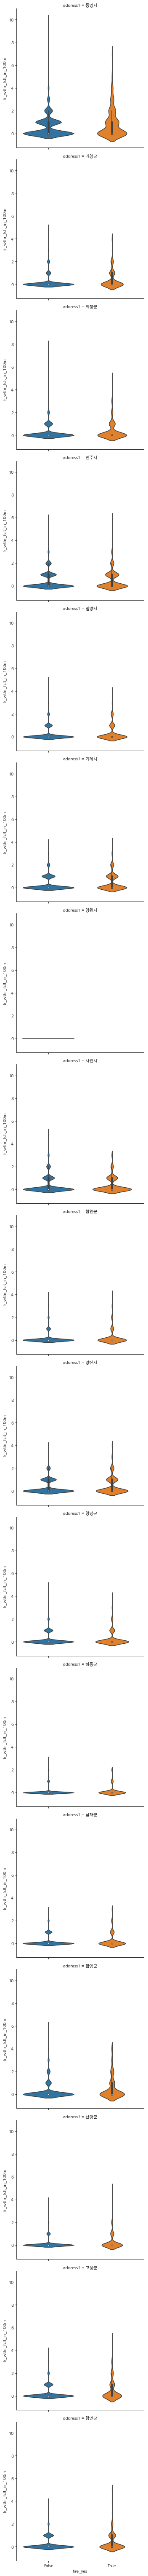

In [170]:
sns.catplot(y='fr_wthr_fclt_in_100m', row='address1', kind='violin', x='fire_yes', data=train)

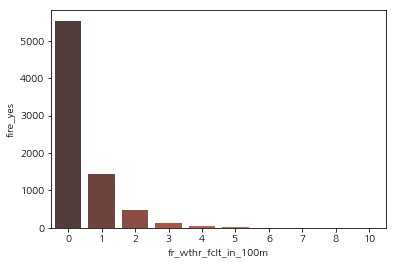

In [158]:
data = pd.DataFrame(train.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum()).reset_index()

sns.barplot(x='fr_wthr_fclt_in_100m', y='fire_yes', data=data, palette='OrRd_d')

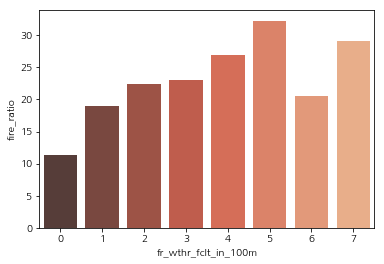

In [159]:
# 소방용수 시설 거리에 따른 화재발생 비율

data_True = pd.DataFrame(train[train['fire_yes'] == True].groupby(['fr_wthr_fclt_in_100m', 'fire_yes'])['id'].sum()).reset_index()
data_False = pd.DataFrame(train[train['fire_yes'] == False].groupby(['fr_wthr_fclt_in_100m', 'fire_yes'])['id'].sum()).reset_index()

data = data_True.merge(data_False, how='inner', on='fr_wthr_fclt_in_100m')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

# data
sns.barplot(x='fr_wthr_fclt_in_100m', y='fire_ratio', data=data, palette='OrRd_d')

## ahsm_dstnc 자동심장충격기와의 거리 
상관없을것 같은데, 외진 곳일수록 자동심장충격기도 적어서 결국 외진 곳에서 화재발생 많이 난다는 뜻?

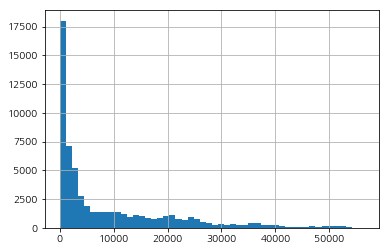

In [140]:
train['ahsm_dstnc'].hist(bins=50)

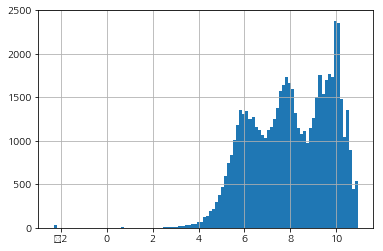

In [147]:
# log scale 적용
train['ahsm_dstnc(log)'] = train['ahsm_dstnc'].apply(lambda x: np.log(x))
train.loc[train['ahsm_dstnc'] == 0, 'ahsm_dstnc(log)'] = np.log(0.1)

train['ahsm_dstnc(log)'].hist(bins=100)

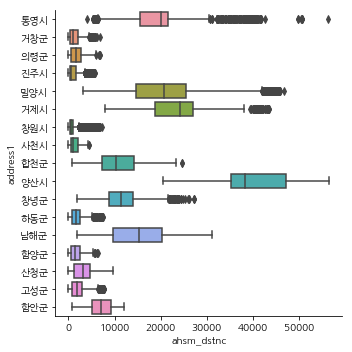

In [328]:
sns.catplot(y='address1', x='ahsm_dstnc', data=train, kind='box')
plt.show()

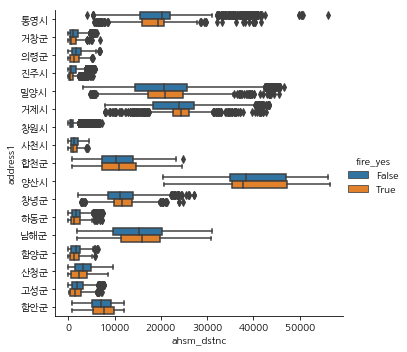

In [327]:
sns.catplot(y='address1', x='ahsm_dstnc', data=train, hue='fire_yes', kind='box')
plt.show()

화재발생여부 보다 지역간 편차가 크다

## jmk 용도

In [173]:
train['jmk'].unique()

array(['대', '주', '잡', '종', '차', '답', '장', '양', '전', '창', '학', '목', '도',
       '임', '철', '유', '천', '구', '체', '과', '묘', '공', '원', '사', '제', '수'],
      dtype=object)

### train 데이터 전체의 jmk 분포

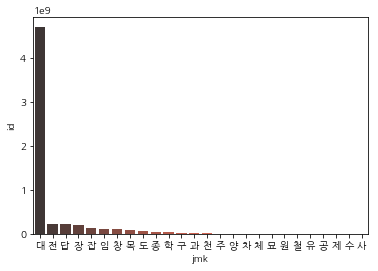

In [190]:
all_jmk = pd.DataFrame(train.groupby('jmk')['id'].sum()).reset_index()
all_jmk = all_jmk.sort_values('id', ascending=False)
columns = all_jmk['jmk']
sns.barplot(x='jmk', y='id', data=all_jmk, palette='OrRd_d')

### jmk 별 화재발생 건수

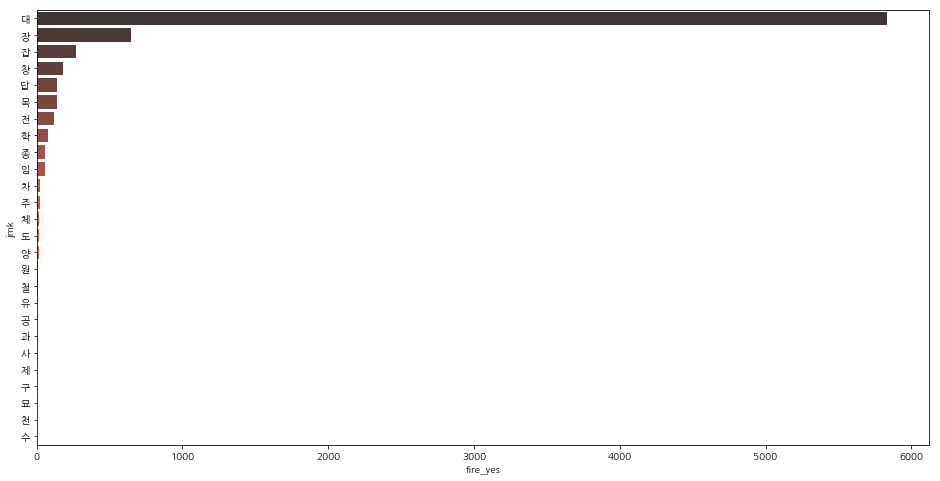

In [192]:
fire_jmk = pd.DataFrame(train.groupby('jmk')['fire_yes'].sum()).reset_index()
fire_jmk = fire_jmk.sort_values(['fire_yes'], ascending=False)

plt.figure(figsize=[16, 8])
sns.barplot(y='jmk', x='fire_yes', data=fire_jmk, palette='OrRd_d')

### jmk 별 화재발생 수 log-scale 

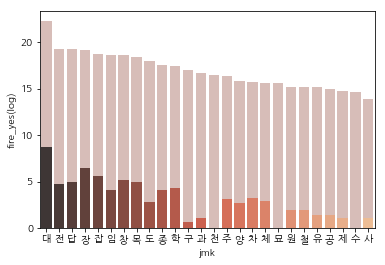

In [272]:
all_jmk['id(log)'] = all_jmk['id'].apply(lambda x: np.log(x))

sns.barplot(x='jmk', y='id(log)', data=all_jmk, color='#DCBAB3')
sns.barplot(x='jmk', y='fire_yes(log)', order=columns, data=fire_jmk, palette='OrRd_d')

### 각 지목jmk별 화재발생 비율 계산 

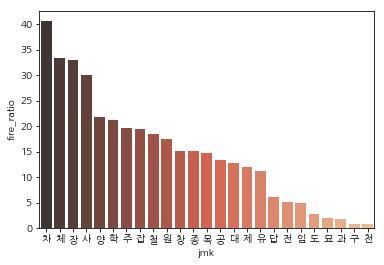

In [430]:
data_True = pd.DataFrame(train[train['fire_yes'] == True].groupby(['jmk', 'fire_yes'])['id'].size()).reset_index()
data_False = pd.DataFrame(train[train['fire_yes'] == False].groupby(['jmk', 'fire_yes'])['id'].size()).reset_index()

data = data_True.merge(data_False, how='left', on='jmk')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

data = data.sort_values('fire_ratio', ascending=False)
data[['jmk', 'fire_ratio']]

sns.barplot(x='jmk', y='fire_ratio', data=data, palette='OrRd_d')

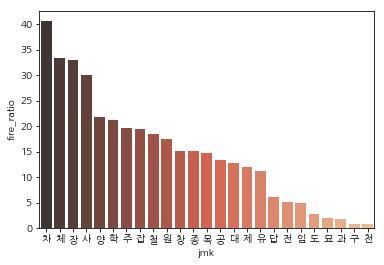

In [444]:
data_True = pd.DataFrame(train[train['fire_yes'] == True].groupby(['jmk', 'fire_yes'])['id'].size()).reset_index()
data_False = pd.DataFrame(train[train['fire_yes'] == False].groupby(['jmk', 'fire_yes'])['id'].size()).reset_index()

data = data_True.merge(data_False, how='left', on=['jmk'])
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

data = data.sort_values('fire_ratio', ascending=False)
data[['jmk', 'fire_ratio']]

sns.barplot(x='jmk', y='fire_ratio', data=data, palette='OrRd_d')

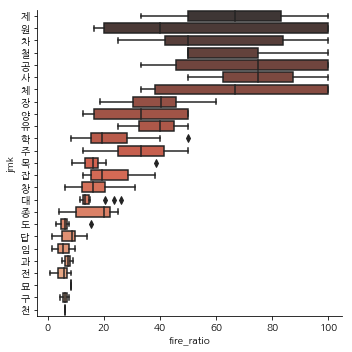

In [442]:
data_True = pd.DataFrame(train[train['fire_yes'] == True].groupby(['address1', 'jmk', 'fire_yes'])['id'].size()).reset_index()
data_False = pd.DataFrame(train[train['fire_yes'] == False].groupby(['address1', 'jmk', 'fire_yes'])['id'].size()).reset_index()

data = data_True.merge(data_False, how='left', on=['address1', 'jmk'])
# Null 값 채우기
data['fire_yes_y'] = data['fire_yes_y'].fillna(False)
data['id_y'] = data['id_y'].fillna(0)

data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

data = data.sort_values('fire_ratio', ascending=False)
# data[['address1', 'jmk', 'fire_ratio']]

sns.catplot(y='jmk', x='fire_ratio', data=data, kind='box', palette='OrRd_d')

### 지역별 jmk

In [416]:
# 지역별 jmk 그룹바이
jmk_address1 = pd.DataFrame(train.groupby(['address1', 'jmk'])['id'].size().reset_index())
jmk_address1['id(log)'] = jmk_address1['id'].apply(lambda x: np.log(x))
# jmk 항목 리스트
jmk = train['jmk'].unique()

# 데이터 없는 jmk 행 id(합계) 0 으로 추가
for where in list(jmk_address1['address1'].unique()):
    for x in jmk:
        if x not in jmk_address1[jmk_address1['address1'] == where]['jmk']: 
            jmk_address1 = jmk_address1.append({'address1':where, 'jmk':x, 'id':0, 'id(log)':0}, ignore_index=True)

# 그룹별 합치기
data = pd.DataFrame(jmk_address1.groupby(['address1', 'jmk'])['id'].sum().reset_index())
data['id(log)'] = data['id'].apply(lambda x: np.log(x) if x != 0 else 0)

data

(391, 4)


,address1,jmk,id,id(log)
0,거제시,공,3,1.098612
1,거제시,과,2,0.693147
2,거제시,구,12,2.484907
3,거제시,답,127,4.844187
4,거제시,대,2938,7.985484
5,거제시,도,27,3.295837
6,거제시,목,13,2.564949
7,거제시,묘,1,0.000000
8,거제시,사,0,0.000000
9,거제시,수,2,0.693147


In [418]:
# sns.lineplot(x='jmk', y='id(log)', hue='address1', data=jmk_address1)
# plt.legend(loc=[1, 0])

px.line(data, x='jmk', y='id(log)', color='address1')

In [379]:
data = jmk_address1[jmk_address1['address1'] == '고성군']

for x in ['거창군', '남해군', '산청군', '통영시']:
    data = pd.concat([data, jmk_address1[jmk_address1['address1'] == x]])
data['address1'].unique()

# sns.lineplot(x='jmk', y='id(log)', hue='address1', data=data)
# plt.legend(loc=[1, 0])
px.line(data, x='jmk', y='id', log_y=True, color='address1')

## fr_sttn_dstnc

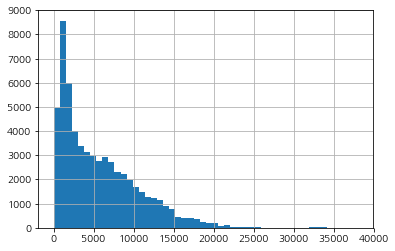

In [226]:
train['fr_sttn_dstnc'].hist(bins=50)

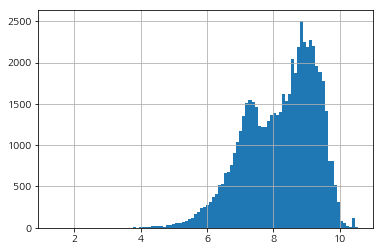

In [229]:
train['fr_sttn_dstnc(log)'] = train['fr_sttn_dstnc'].apply(lambda x: np.log(x))

train['fr_sttn_dstnc(log)'].hist(bins=100)

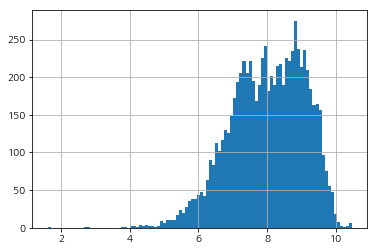

In [423]:
train[train['fire_yes'] == True]['fr_sttn_dstnc(log)'].hist(bins=100)

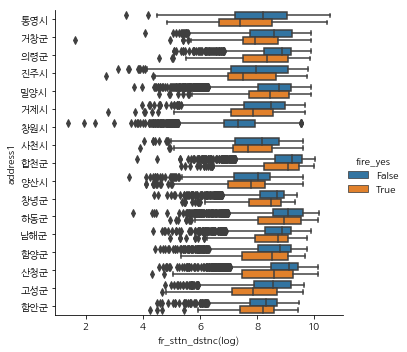

In [249]:
sns.catplot(y='address1', x='fr_sttn_dstnc(log)', hue='fire_yes', kind='box', data=train)

119소방센터와의 거리가 더 가까울수록 화재발생건수가 많다
- 큰 차이를 보이지는 않지만, 전 지역에 동일하게 나타난다

## tbc_rtl_str_dstnc 담배소매점과의 거리

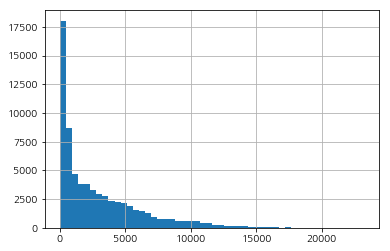

In [236]:
df['tbc_rtl_str_dstnc'].hist(bins=50)

### tbc_rtl_str_dstnc 담배소매점과의 거리 log scale

In [240]:
train['tbc_rtl_str_dstnc(log)'] = np.log(train['tbc_rtl_str_dstnc'])
# 담배 소매점과의 거리가 0 인 곳이 80여곳 있어서, log 값을 그래프에 나타내기 위해 0.1로 고쳐줌
train.loc[train['tbc_rtl_str_dstnc'] == 0, 'tbc_rtl_str_dstnc(log)'] = 0.1
train[['tbc_rtl_str_dstnc', 'tbc_rtl_str_dstnc(log)']].sample()

,tbc_rtl_str_dstnc,tbc_rtl_str_dstnc(log)
6789,3188,8.067149


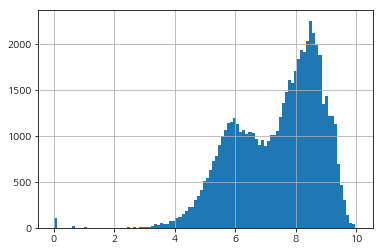

In [241]:
train['tbc_rtl_str_dstnc(log)'].hist(bins=100)

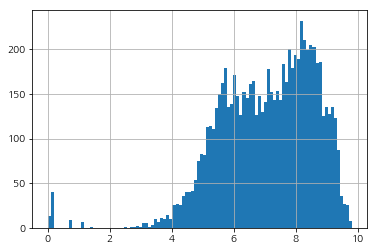

In [242]:
train[train['fire_yes'] == True]['tbc_rtl_str_dstnc(log)'].hist(bins=100)

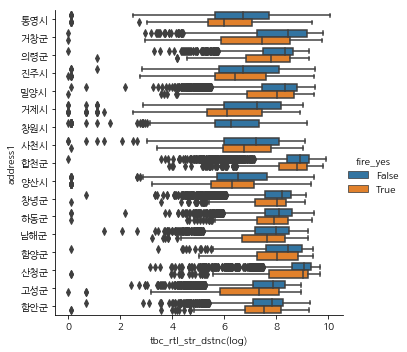

In [248]:
sns.catplot(y='address1', x='tbc_rtl_str_dstnc(log)', hue='fire_yes', kind='box', data=train)

담배소매점과의 거리가 더 가까울수록 화재발생건수가 많다
- 큰 차이를 보이지는 않지만, 전 지역에 동일하게 나타난다

## 행정구역별 화재발생건수

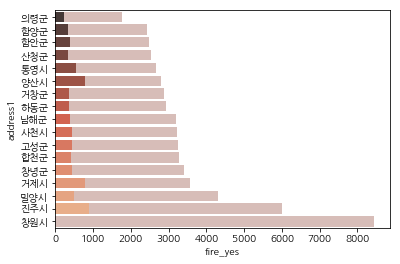

In [271]:
all_address1 = pd.DataFrame(train.groupby('address1')['id'].size().reset_index())
all_address1 = all_address1.sort_values('id')
fire_address1 = pd.DataFrame(train.groupby('address1')['fire_yes'].sum().reset_index())

sns.barplot(y='address1', x='id', data=all_address1, color='#DCBAB3')
sns.barplot(y='address1', x='fire_yes', order = all_address1['address1'], data=fire_address1, palette='OrRd_d')

창원시는 화재발생 데이터 0건
- 창원시 전체를 제외하는 게 좋을 듯

## hm_cnt 행정구역 인구

In [546]:
df[df['address'] == '양산시 물금읍'][['year', 'hm_cnt']].sort_values('year')

,year,hm_cnt
4658,2014,59750.0
4435,2014,53752.0
4433,2014,53752.0
4423,2014,60524.0
4422,2014,60524.0
4421,2014,60524.0
4419,2014,60524.0
4416,2014,60524.0
25514,2014,62134.0
25584,2014,55563.0


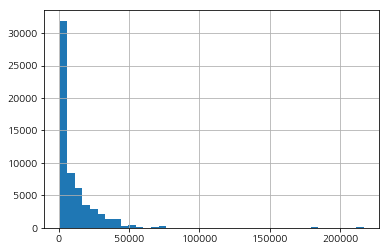

In [275]:
train['hm_cnt'].hist(bins=40)

### 행정구역 인구별 전체 데이터 수(log-scale)

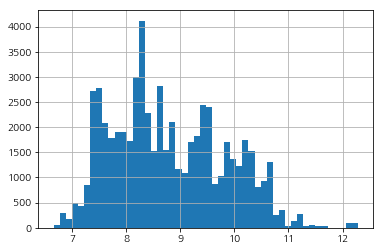

In [277]:
np.log(train['hm_cnt']).hist(bins=50)

### 행정구역 인구별 화재발생 수(log-scale)

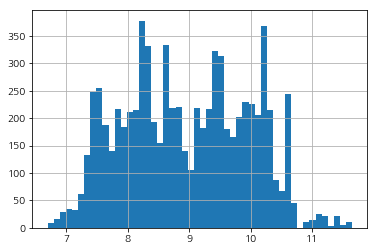

In [279]:
np.log(train[train['fire_yes'] == True]['hm_cnt']).hist(bins=50)

인구가 많은 곳이 상대적으로 화재발생률이 높다

### mlt_us_yn 다중이용시설 포함여부

In [283]:
train['mlt_us_yn(encode)'].unique()

array([False,  True])

In [285]:
fire_mlt_us_yn = pd.DataFrame(train.groupby('mlt_us_yn(encode)')['fire_yes'].sum()).reset_index()
all_mlt_us_yn = pd.DataFrame(train.groupby('mlt_us_yn(encode)')['id'].count()).reset_index()
data = fire_mlt_us_yn.merge(all_mlt_us_yn, on='mlt_us_yn(encode)')
data['ratio'] = data['fire_yes'] * 100 / data['id']
data

,mlt_us_yn(encode),fire_yes,id,ratio
0,False,7544.0,59002,12.786007
1,True,109.0,189,57.671958


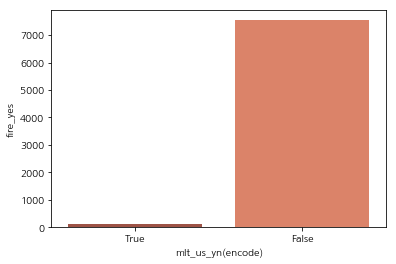

In [299]:
# train 데이터 전체 다중이용시설 포함여부
sns.barplot(x='mlt_us_yn(encode)', y='fire_yes',order=[True, False], data=data, palette='OrRd_d')

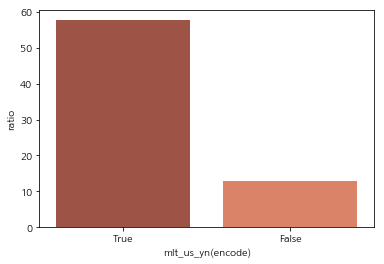

In [298]:
# 다중이용시설 포함여부별 화재발생 비율
sns.barplot(x='mlt_us_yn(encode)', y='ratio', order=[True, False], data=data, palette='OrRd_d')

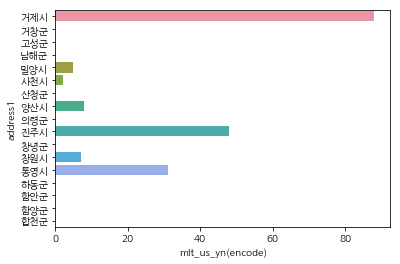

In [331]:
data = pd.DataFrame(train.groupby('address1')['mlt_us_yn(encode)'].sum().reset_index())
sns.barplot(y='address1', x='mlt_us_yn(encode)', data=data)

## fr_mn_cnt 관할소방서 인원

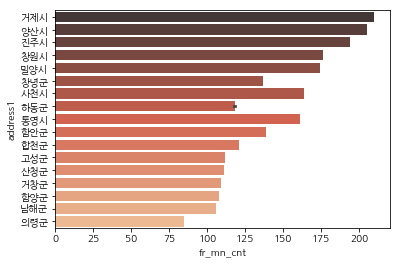

In [323]:
fr_mn_cnt = train.sort_values('fr_mn_cnt', ascending=False)

sns.barplot(y='address1', x='fr_mn_cnt', data=fr_mn_cnt, palette='OrRd_d')

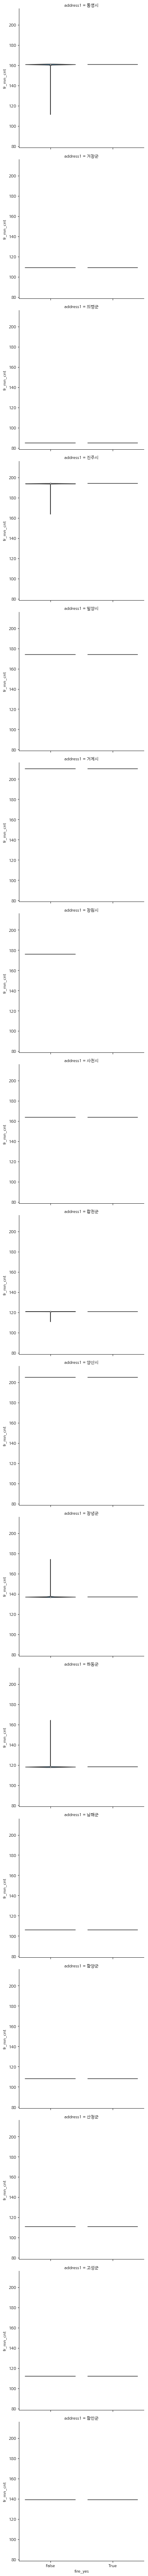

In [424]:
sns.catplot(row='address1', y='fr_mn_cnt', x='fire_yes', kind='violin', data=train)